# Airbnb in New York City - an explorative data analysis

On todays session we want to analyze the Airbnb offer in New York City using and improving our already learned knowledge about data science!

<img src="./_img/NYC_2.jpg"> 

For this tutorial the following commands will be very helpful:

| commands | meaning |
| :-: | :-: |
| `pd.read_csv(<path>)` | Reading a .csv-File from your file System | 
| `len()` | return the length of an input object, for example the row count of an pandas dataframe | 
| `df.columns()` | returns the column names of a dataframe |
| `df.head(<n>)` | returns the first n rows of a dataframe | 
| `df.tail(<n>)` | returns the last n rows of a dataframe | 
| `df.loc[]` | locator to filter a dataframe | 
| `df.loc["<column_name>"]` | filter a dataframe to a given column / return only the specified column of a dataframe | 
| `df.sample(<n>)` | picks randomly n rows out of a dataframe | 
| `df.shape()` | returns the dimensions of a dataframe | 
| `df.unique()` | returns the unique values for each column of a dataframe |  
| `df.groupby("<column_name>")` | groups the information of a dataframe by the specified column | 
| `df.groupby("<column_name>").size()` | return the number of observation in each group | 
| `df.groupby("<column_name>").sort_values()` | sort the output by values, may based on a specified column | 
| `df.groupby("<column_name>").xs("<column_name>")` | extract a specific value set out of a grouped information which consists out of a multi level index | 
| `series.mean()` | calculates the mean value based on the given information list | 
| `df.describe()` | returns a statistical description for all columns of a given dataframe | 

## Loading packages and dataset

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
airbnb_NY = pd.read_csv("../data/Airbnb_NYC.csv")

## Get to know the dataset

> **Question 1)** How many observations yields the dataset?

In [4]:
len(airbnb_NY)

38733

In [5]:
airbnb_NY.shape[0]

38733

Okay, now let's get a quick overview:

> **Question 2A)** show the first 10 observations of the dataset!

In [6]:
airbnb_NY.head(10)
airbnb_NY.loc[0:10]

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
0,Bronx,40.80011,-73.91330,PrivateRoom,21.0,2.0,291,19,0.27,60.0
1,Bronx,40.80024,-73.91422,PrivateRoom,3.0,1.0,0,59,2.93,49.0
2,Bronx,40.80074,-73.91574,PrivateRoom,3.0,1.0,354,3,0.87,50.0
3,Bronx,40.80091,-73.91449,PrivateRoom,21.0,2.0,117,18,0.36,71.0
4,Bronx,40.80143,-73.91353,EntireHome,2.0,3.0,0,12,3.50,115.0
5,Bronx,40.80247,-73.91435,EntireHome,2.0,1.0,300,157,3.29,90.0
6,Bronx,40.80270,-73.91563,EntireHome,2.0,3.0,50,14,3.89,109.0
7,Bronx,40.80273,-73.91519,EntireHome,4.0,3.0,134,11,3.40,115.0
8,Bronx,40.80408,-73.92270,EntireHome,2.0,1.0,125,6,0.80,175.0
9,Bronx,40.80461,-73.92276,PrivateRoom,3.0,2.0,248,86,1.12,60.0


> **Question 2B)** show the last 15 observations of the dataset!

In [7]:
airbnb_NY.tail(15)
airbnb_NY.iloc[-10:]

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
38723,Staten Island,40.64591,-74.08399,EntireHome,1.0,1.0,318,115,5.49,125.0
38724,Staten Island,40.64594,-74.08342,PrivateRoom,30.0,4.0,365,52,0.80,169.0
38725,Staten Island,40.64596,-74.08059,EntireHome,4.0,6.0,115,99,3.41,65.0
38726,Staten Island,40.64601,-74.08304,PrivateRoom,30.0,4.0,0,87,1.35,69.0
38727,Staten Island,40.64605,-74.07897,EntireHome,4.0,6.0,247,2,0.15,289.0
38728,Staten Island,40.64641,-74.08502,EntireHome,2.0,1.0,106,58,4.73,130.0
38729,Staten Island,40.64682,-74.08734,PrivateRoom,20.0,1.0,89,58,1.05,43.0
38730,Staten Island,40.64730,-74.08408,PrivateRoom,30.0,4.0,0,85,1.35,105.0
38731,Staten Island,40.64762,-74.08682,EntireHome,3.0,1.0,232,5,1.88,135.0
38732,Staten Island,40.64779,-74.08460,EntireHome,1.0,1.0,250,108,2.32,140.0


> **Question 2C)** choose randomly 15 observations out of the dataset and show them!

In [8]:
airbnb_NY.sample(15)

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
16586,Brooklyn,40.72243,-73.95179,EntireHome,8.0,2.0,0,2,0.13,130.0
10805,Brooklyn,40.69211,-73.98102,PrivateRoom,3.0,1.0,10,61,2.71,125.0
15850,Brooklyn,40.71687,-73.94656,EntireHome,1.0,1.0,1,67,1.34,140.0
23008,Manhattan,40.74307,-73.98386,EntireHome,1.0,1.0,265,9,5.63,170.0
8380,Brooklyn,40.68527,-73.95014,EntireHome,4.0,1.0,97,46,2.11,130.0
14610,Brooklyn,40.71147,-73.95312,EntireHome,6.0,1.0,0,2,0.04,150.0
21910,Manhattan,40.73450,-73.98482,EntireHome,6.0,1.0,168,11,0.40,325.0
3906,Brooklyn,40.66399,-73.98301,EntireHome,3.0,2.0,25,5,0.20,210.0
15766,Brooklyn,40.71636,-73.96246,PrivateRoom,2.0,8.0,128,101,2.17,60.0
15438,Brooklyn,40.71468,-73.93774,EntireHome,2.0,1.0,0,1,1.00,100.0


In [9]:
from random import sample
r_index = sample(range(0, len(airbnb_NY)), 15)
airbnb_NY.loc[r_index]

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
19182,Manhattan,40.72135,-73.98000,PrivateRoom,5.0,1.0,0,12,0.20,85.0
16859,Brooklyn,40.72672,-73.94054,SharedRoom,3.0,1.0,0,4,0.26,125.0
9475,Brooklyn,40.68805,-73.96952,EntireHome,2.0,2.0,0,131,3.02,150.0
34896,Queens,40.70719,-73.89632,PrivateRoom,14.0,1.0,359,11,0.15,75.0
6498,Brooklyn,40.67917,-73.93103,EntireHome,1.0,1.0,314,7,0.39,700.0
33636,Manhattan,40.86755,-73.92870,PrivateRoom,2.0,1.0,319,21,1.68,125.0
3228,Brooklyn,40.65755,-73.92341,EntireHome,2.0,1.0,64,19,1.43,80.0
11356,Brooklyn,40.69389,-73.93472,PrivateRoom,1.0,2.0,0,5,0.31,45.0
19651,Manhattan,40.72321,-73.99514,EntireHome,3.0,1.0,0,3,0.09,199.0
18053,Manhattan,40.71374,-73.98907,PrivateRoom,1.0,2.0,342,10,0.58,100.0


> **Question 2D)** like C) but only the borough, property type and the price should be shown

In [10]:
airbnb_NY.sample(15)[["Boroughs", "Prop_Type", "Price"]]
airbnb_NY.sample(15).iloc[:,[0, 3, 9]]

,Boroughs,Prop_Type,Price
21429,Manhattan,PrivateRoom,140.0
5757,Brooklyn,EntireHome,115.0
24963,Manhattan,PrivateRoom,180.0
11361,Brooklyn,EntireHome,250.0
27315,Manhattan,EntireHome,100.0
32841,Manhattan,PrivateRoom,55.0
30739,Manhattan,EntireHome,170.0
18177,Manhattan,EntireHome,179.0
1423,Brooklyn,EntireHome,70.0
21667,Manhattan,EntireHome,246.0


## The spatial context matters

Let's take a deeper look on the dataset

> **Question 3A)** Which boroughs of NYC are covered by the dataset?

In [11]:
airbnb_NY["Boroughs"].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

> **Question 3B) Which different kind of accomodations exists?**

In [12]:
airbnb_NY["Prop_Type"].unique()

array(['PrivateRoom', 'EntireHome', 'SharedRoom'], dtype=object)

> **Question 3C)** How many airbnb offers exists per borough?

In [13]:
airbnb_NY.groupby("Boroughs").size().to_frame("AirBnBs per Borough")

,AirBnBs per Borough
Boroughs,
Bronx,891
Brooklyn,16436
Manhattan,16383
Queens,4695
Staten Island,328


> **Question 3D)** Order the output from C) by the count of offers!

In [14]:
airbnb_NY.groupby("Boroughs").size().sort_values(ascending = False).to_frame("AirBnBs per Borough")

,AirBnBs per Borough
Boroughs,
Brooklyn,16436
Manhattan,16383
Queens,4695
Bronx,891
Staten Island,328


> **Question 3E)** Refine your search: how does the type of property is influenced by the boroughs? Provide a list view!

In [15]:
airbnb_NY.groupby(["Boroughs", "Prop_Type"]).size().to_frame("Count")

Count
Boroughs      Prop_Type         
Bronx         EntireHome     308
              PrivateRoom    532
              SharedRoom      51
Brooklyn      EntireHome    8163
              PrivateRoom   7992
              SharedRoom     281
Manhattan     EntireHome    9776
              PrivateRoom   6258
              SharedRoom     349
Queens        EntireHome    1770
              PrivateRoom   2772
              SharedRoom     153
Staten Island EntireHome     156
              PrivateRoom    166
              SharedRoom       6

> **Question 3F)** Provide a plot to visualize E) 
hint: try at first to provide a barplot only for Bronx and afterwars for all boroughs at the same time)

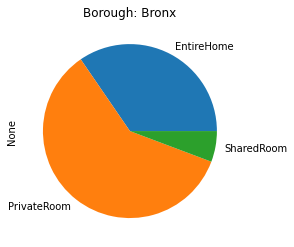

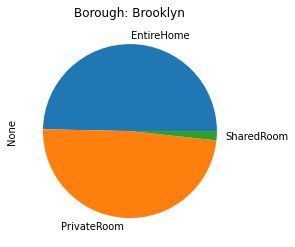

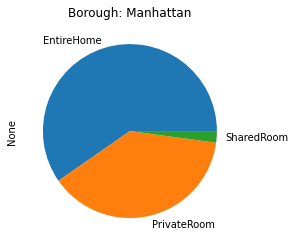

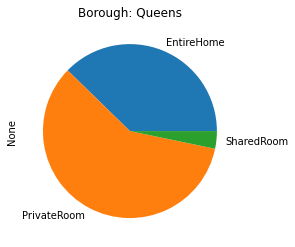

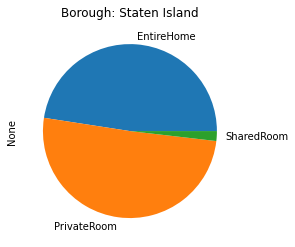

In [16]:
# Plot a pie chart of the property type share for each borough in an iterative way
grouped = airbnb_NY.groupby(["Boroughs", "Prop_Type"]).size()
for borough in airbnb_NY["Boroughs"].unique():
    grouped.xs(borough).plot.pie()
    plt.title("Borough: " + borough)
    plt.show()

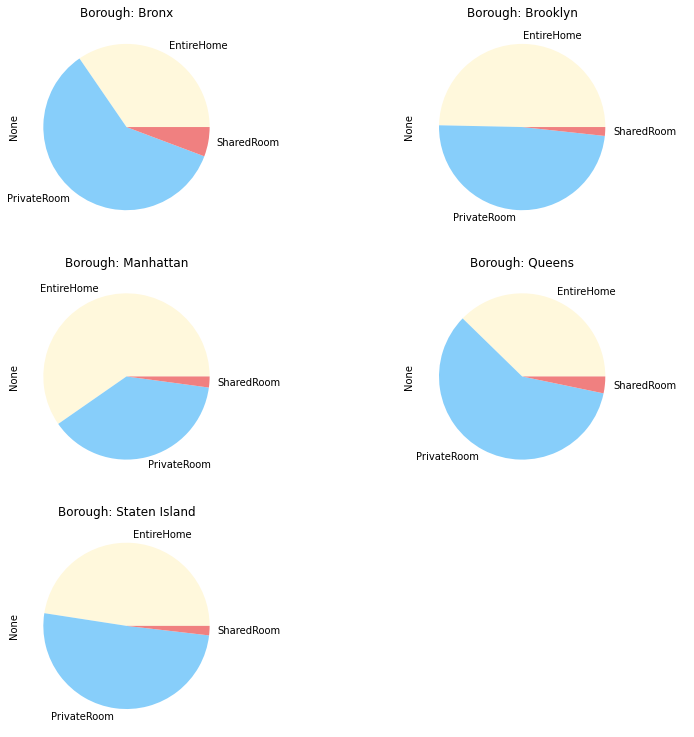

In [18]:
# Doing the same like above, but controlling how the plots should be created
plt.rcParams["figure.figsize"] = [13,13]

# creating a subplot object, in the manner that in sum 6 plots should be created
# you will get a 3x2 Matrix back (3 rows, 2 columns) for your plots
fig, axs = plt.subplots(3, 2)
# we only want to do 5 plots. Thats why we dont need the last plotting space
axs[-1, -1].axis('off')
# Transforming the two dimensional matrix to an one dimensional array for easier handling in a loop
axen = axs.ravel()

# define your own colors of choice
colors = ["cornsilk", "lightskyblue", "lightcoral"]

grouped = airbnb_NY.groupby(["Boroughs", "Prop_Type"]).size()

# the actual plotting
for ax, borough in zip(axen, airbnb_NY["Boroughs"].unique()):
    grouped.xs(borough).plot.pie(ax = ax, colors = colors)
    ax.title.set_text("Borough: " + borough)

<AxesSubplot:xlabel='Boroughs'>

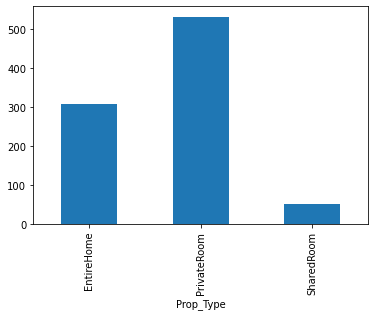

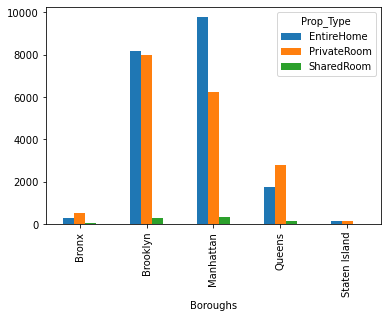

In [15]:
# Visualization as bar plot
airbnb_NY.groupby(["Boroughs", "Prop_Type"]).size().xs("Bronx").plot.bar()
airbnb_NY.groupby(["Boroughs", "Prop_Type"]).size().unstack().plot.bar()

## What about the prices?

> **Question 4A)** In which borough the most expensive airbnb is found?

In [30]:
airbnb_NY.sort_values(["Price"], ascending = False)

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
37908,Queens,40.76810,-73.91651,PrivateRoom,100.0,1.0,0,2,0.04,10000.0
17131,Brooklyn,40.73260,-73.95739,EntireHome,5.0,1.0,0,5,0.16,10000.0
29120,Manhattan,40.79264,-73.93898,EntireHome,5.0,1.0,0,1,0.02,9999.0
18036,Manhattan,40.71355,-73.98507,PrivateRoom,99.0,1.0,83,6,0.13,9999.0
19354,Manhattan,40.72197,-74.00633,EntireHome,30.0,1.0,28,2,0.17,8500.0
...,...,...,...,...,...,...,...,...,...,...
10672,Brooklyn,40.69166,-73.90928,SharedRoom,30.0,6.0,364,5,0.25,NaN
10807,Brooklyn,40.69211,-73.90670,SharedRoom,30.0,6.0,361,2,0.10,NaN
11603,Brooklyn,40.69467,-73.92433,PrivateRoom,2.0,5.0,0,16,0.68,NaN
13914,Brooklyn,40.70838,-73.94645,EntireHome,5.0,1.0,8,3,0.14,NaN


> **Question 4B)** How many airbnb exists that are in price less than 50 $?

In [31]:
airbnb_NY.loc[airbnb_NY.Price < 50].shape[0]

3994

> **Question 4C)** Refining B) in which borough are most of them located?

In [43]:
airbnb_NY.loc[airbnb_NY.Price < 50].groupby("Boroughs").size().to_frame("count")

,count
Boroughs,
Bronx,269
Brooklyn,2110
Manhattan,550
Queens,982
Staten Island,83


> **Question 4D)** Take a closer look at C): provide a ranking of the mean Review-count of these airbnbs per borough!

In [45]:
airbnb_NY.loc[airbnb_NY.Price < 50].groupby("Boroughs").mean().sort_values("Reviews30d", ascending = False)["Reviews30d"].to_frame("mean review")

,mean review
Boroughs,
Queens,2.023870
Staten Island,1.580241
Bronx,1.558290
Brooklyn,1.109232
Manhattan,1.053291


## Statistics count!

> **Question 5A**) What is the mean cost of an airbnb in NYC?

In [34]:
round(airbnb_NY["Price"].mean(), 2)

140.88

> **Question 5B)** How does the price vary?

In [48]:
round(airbnb_NY["Price"].describe(), 2).to_frame()

,Price
count,38724.00
mean,140.88
std,194.49
min,10.00
25%,68.00
50%,100.00
75%,169.00
max,10000.00


> **Question 5C)** How is the price changing according to the property type? which property type the less expansive one?

In [50]:
round(airbnb_NY.groupby("Prop_Type").mean()["Price"].sort_values(ascending=True), 2).to_frame()

,Price
Prop_Type,
SharedRoom,63.11
PrivateRoom,83.99
EntireHome,194.06


> **Question 5D)** how does the mean airbnb price is changing according to the boroughs?

In [51]:
round(airbnb_NY.groupby("Boroughs").mean()["Price"].sort_values(ascending=True), 2).to_frame()

,Price
Boroughs,
Bronx,80.92
Staten Island,89.18
Queens,95.13
Brooklyn,121.22
Manhattan,177.99


> **Question 6E)** Which are top 10 rated airbnb per borough? calculate the mean price of them!

In [38]:
airbnb_NY.groupby("Boroughs").apply(lambda x: x.sort_values("Reviews30d", ascending = False).head(10)["Price"].mean()).to_frame("Mean_Price")

,Mean_Price
Boroughs,
Bronx,99.4
Brooklyn,79.6
Manhattan,108.6
Queens,52.8
Staten Island,84.8


In [39]:
grouped = airbnb_NY.groupby("Boroughs").apply(lambda x: x.sort_values("Reviews30d", ascending = False))

In [40]:
airbnb_NY["Boroughs"].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [41]:
for borough in airbnb_NY["Boroughs"].unique():
    top_ten = grouped.xs(borough).head(10)
    display(top_ten.iloc[:,[0, 3, 8, 9]])
    print(borough + ": " + str(top_ten.Price.mean()) + " $")

,Boroughs,Prop_Type,Reviews30d,Price
265,Bronx,EntireHome,10.41,95.0
576,Bronx,EntireHome,9.62,60.0
752,Bronx,EntireHome,9.00,57.0
122,Bronx,EntireHome,8.44,85.0
879,Bronx,PrivateRoom,8.31,34.0
44,Bronx,EntireHome,8.05,95.0
185,Bronx,EntireHome,7.43,75.0
877,Bronx,PrivateRoom,7.18,55.0
884,Bronx,EntireHome,7.00,288.0
339,Bronx,PrivateRoom,6.98,150.0


Bronx: 99.4 $


,Boroughs,Prop_Type,Reviews30d,Price
1124,Brooklyn,EntireHome,15.00,139.0
2385,Brooklyn,PrivateRoom,14.69,45.0
5249,Brooklyn,PrivateRoom,12.73,85.0
12442,Brooklyn,PrivateRoom,12.00,50.0
9932,Brooklyn,PrivateRoom,12.00,50.0
12953,Brooklyn,EntireHome,11.58,99.0
9359,Brooklyn,EntireHome,11.07,115.0
6402,Brooklyn,PrivateRoom,11.05,48.0
6061,Brooklyn,PrivateRoom,10.94,35.0
1687,Brooklyn,EntireHome,10.67,130.0


Brooklyn: 79.6 $


,Boroughs,Prop_Type,Reviews30d,Price
25020,Manhattan,PrivateRoom,66.61,100.0
24919,Manhattan,PrivateRoom,33.08,199.0
24880,Manhattan,PrivateRoom,15.42,100.0
29756,Manhattan,PrivateRoom,12.48,80.0
33119,Manhattan,PrivateRoom,10.48,50.0
23582,Manhattan,PrivateRoom,10.31,100.0
18492,Manhattan,EntireHome,10.00,210.0
23862,Manhattan,SharedRoom,9.94,62.0
26950,Manhattan,PrivateRoom,9.54,85.0
28434,Manhattan,PrivateRoom,9.47,100.0


Manhattan: 108.6 $


,Boroughs,Prop_Type,Reviews30d,Price
33920,Queens,PrivateRoom,20.49,46.0
33955,Queens,PrivateRoom,19.19,80.0
33958,Queens,PrivateRoom,17.31,50.0
34060,Queens,PrivateRoom,17.27,34.0
33982,Queens,PrivateRoom,16.32,50.0
33993,Queens,EntireHome,16.13,75.0
37538,Queens,PrivateRoom,16.08,48.0
37575,Queens,PrivateRoom,15.98,48.0
34032,Queens,PrivateRoom,15.54,30.0
34029,Queens,PrivateRoom,14.93,67.0


Queens: 52.8 $


,Boroughs,Prop_Type,Reviews30d,Price
38596,Staten Island,PrivateRoom,9.30,40.0
38552,Staten Island,EntireHome,9.13,100.0
38583,Staten Island,EntireHome,9.00,60.0
38441,Staten Island,PrivateRoom,8.61,45.0
38554,Staten Island,EntireHome,8.09,65.0
38546,Staten Island,EntireHome,7.81,138.0
38538,Staten Island,EntireHome,7.32,115.0
38590,Staten Island,EntireHome,7.20,70.0
38667,Staten Island,EntireHome,7.17,80.0
38655,Staten Island,PrivateRoom,6.14,135.0


Staten Island: 84.8 $
